<a href="https://colab.research.google.com/github/hannanote/Mobile_Health_Human_Behavior_Analysis/blob/main/MOBILE_HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Health Human Behavior Analysis Project
#### This project is to do a ML project that predicts human behavior analysis based on multimodel body sensing.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

#### import data folder
##### https://archive.ics.uci.edu/dataset/319/mhealth+dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Downloading data from UCI Machine Learning repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2025-01-07 12:56:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip      [      <=>           ]  72.07M  64.0MB/s    in 1.1s    

2025-01-07 12:56:19 (64.0 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASET/mHealth_subject7.log  
  inflating: 

In [ ]:
# checking lists on the file
os.listdir('MHEALTHDATASET/')

['mHealth_subject9.log',
 'mHealth_subject2.log',
 'mHealth_subject6.log',
 'mHealth_subject3.log',
 'mHealth_subject7.log',
 'mHealth_subject1.log',
 'mHealth_subject5.log',
 'README.txt',
 'mHealth_subject8.log',
 'mHealth_subject4.log',
 'mHealth_subject10.log']

In [ ]:
# Exclude 'README.txt' file
for file in os.listdir('MHEALTHDATASET/'):
  if  file != ('README.txt'):
    print(file)

mHealth_subject1.log
mHealth_subject10.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log


### Import the data and Data Exploration
#### 10 volunteers who performed 12 different physical activites.

In [ ]:
# combine all data
df = pd.DataFrame()

for i in range(1,11):
  df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
  df = pd.concat([df, df1])
df
#1215745 rows × 24 columns

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,-9.2476,-0.248070,-2.62230,0.230250,0.234430,1.7849,-9.8287,0.29725,-0.341370,-0.90056,...,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0
98300,-9.4632,-0.073513,-2.11190,0.276300,0.284670,1.8687,-9.8766,0.46236,-0.341370,-0.90056,...,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0
98301,-9.4011,-0.144580,-3.02350,0.288850,0.301410,1.6928,-9.9290,0.16631,-0.341370,-0.90056,...,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0
98302,-9.3732,-0.026252,-2.70760,0.351650,0.347460,1.5279,-9.6306,0.30458,-0.341370,-0.90056,...,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0


#### The activities labels
##### Column 0: acceleration from the chest sensor (X axis)
##### Column 1: acceleration from the chest sensor (Y axis)
##### Column 2: acceleration from the chest sensor (Z axis)
##### Column 3: electrocardiogram signal (lead 1)
##### Column 4: electrocardiogram signal (lead 2)
##### Column 5: acceleration from the left-ankle sensor (X axis)
##### Column 6: acceleration from the left-ankle sensor (Y axis)
##### Column 7: acceleration from the left-ankle sensor (Z axis)
##### Column 8: gyro from the left-ankle sensor (X axis)
##### Column 9: gyro from the left-ankle sensor (Y axis)
##### Column 10: gyro from the left-ankle sensor (Z axis)
##### Column 11: magnetometer from the left-ankle sensor (X axis)
##### Column 12: magnetometer from the left-ankle sensor (Y axis)
##### Column 13: magnetometer from the left-ankle sensor (Z axis)
##### Column 14: acceleration from the right-lower-arm sensor (X axis)
##### Column 15: acceleration from the right-lower-arm sensor (Y axis)
##### Column 16: acceleration from the right-lower-arm sensor (Z axis)
##### Column 17: gyro from the right-lower-arm sensor (X axis)
##### Column 18: gyro from the right-lower-arm sensor (Y axis)
##### Column 19: gyro from the right-lower-arm sensor (Z axis)
##### Column 20: magnetometer from the right-lower-arm sensor (X axis)
##### Column 21: magnetometer from the right-lower-arm sensor (Y axis)
##### Column 22: magnetometer from the right-lower-arm sensor (Z axis)
##### Column 23: Label (0 for the null class)
##### ====================================================================
##### features: df[0:22]
##### target: df[23]

In [ ]:
df[23].value_counts()

,count
23,
0,872550
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720


### 12 physical activites
##### L1: Standing still (1 min)
##### L2: Sitting and relaxing (1 min)
##### L3: Lying down (1 min)
##### L4: Walking (1 min)
##### L5: Climbing stairs (1 min)
##### L6: Waist bends forward (20x)
##### L7: Frontal elevation of arms (20x)
##### L8: Knees bending (crouching) (20x)
##### L9: Cycling (1 min)
##### L10: Jogging (1 min)
##### L11: Running (1 min)
##### L12: Jump front & back (20x)

##### I will remove 0 variable because there is no reference of activity.

In [ ]:
df = df[df[23]>0]
df[23].value_counts()

,count
23,
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720
7,29441


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 96204
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       343195 non-null  float64
 1   1       343195 non-null  float64
 2   2       343195 non-null  float64
 3   3       343195 non-null  float64
 4   4       343195 non-null  float64
 5   5       343195 non-null  float64
 6   6       343195 non-null  float64
 7   7       343195 non-null  float64
 8   8       343195 non-null  float64
 9   9       343195 non-null  float64
 10  10      343195 non-null  float64
 11  11      343195 non-null  float64
 12  12      343195 non-null  float64
 13  13      343195 non-null  float64
 14  14      343195 non-null  float64
 15  15      343195 non-null  float64
 16  16      343195 non-null  float64
 17  17      343195 non-null  float64
 18  18      343195 non-null  float64
 19  19      343195 non-null  float64
 20  20      343195 non-null  float64
 21  21      34319

In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,...,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000
mean,-7.485271,-0.140923,-0.938418,0.003649,-0.008048,1.805184,-9.061487,-0.701985,0.101167,-0.549942,...,-3.448201,-5.781446,2.381165,-0.201574,-0.410515,0.380693,-0.532629,1.422140,0.030670,6.169021
std,5.701949,2.799380,4.611164,0.839074,0.857724,4.214175,5.200389,6.457622,0.458913,0.434721,...,5.891595,6.578371,4.177971,0.549524,0.546359,0.515658,34.216257,30.285262,82.663004,3.298902
min,-22.438000,-20.188000,-18.401000,-8.619600,-8.619600,-22.146000,-19.619000,-19.373000,-1.779200,-2.660400,...,-22.345000,-18.972000,-18.238000,-1.170600,-2.256700,-1.114200,-319.030000,-358.130000,-702.570000,1.000000
25%,-9.707100,-1.294300,-3.686550,-0.213500,-0.171640,0.159875,-10.063000,-3.494350,-0.345080,-0.810510,...,-5.013900,-9.558100,0.139070,-0.682350,-0.831620,-0.040948,-6.228350,-7.272000,-12.170000,3.000000
50%,-8.800300,-0.292570,-0.881070,-0.071167,-0.046049,1.372500,-9.597700,0.340070,0.204080,-0.688560,...,-2.480000,-7.738900,1.819100,-0.300000,-0.597540,0.448280,0.360740,0.353930,-0.709300,6.000000
75%,-5.117400,0.984775,1.092650,0.163270,0.138150,2.924450,-7.549800,1.819300,0.487940,-0.487800,...,-0.539050,-2.359550,5.324750,0.278430,-0.045175,0.840520,5.224000,8.350250,10.302500,9.000000
max,19.094000,20.927000,26.196000,8.506500,8.519100,20.024000,21.161000,25.015000,1.710600,1.752300,...,19.801000,21.965000,25.741000,1.415700,1.121100,1.528000,239.690000,335.250000,657.180000,12.000000


### Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


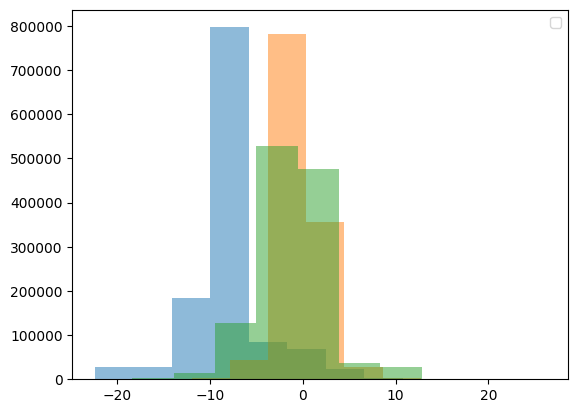

In [ ]:
plt.hist(df[0].reset_index(drop=True), alpha=0.5)
plt.hist(df[1].reset_index(drop=True), alpha=0.5)
plt.hist(df[2].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

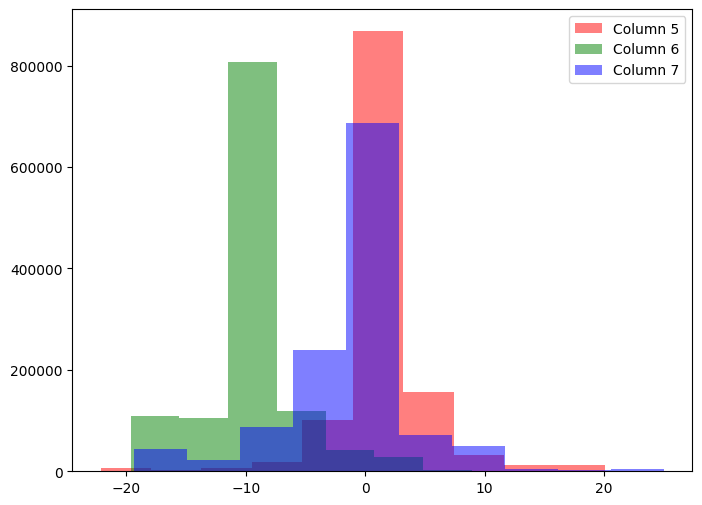

In [ ]:
cols_to_compare = [5, 6, 7]  # Specify the column numbers to compare
colors = ['red', 'green', 'blue']  # Specify the colors for each histogram

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

for i, col in enumerate(cols_to_compare):
    plt.hist(df[col].reset_index(drop=True), alpha=0.5, color=colors[i])

plt.legend(['Column {}'.format(col) for col in cols_to_compare])
plt.show()

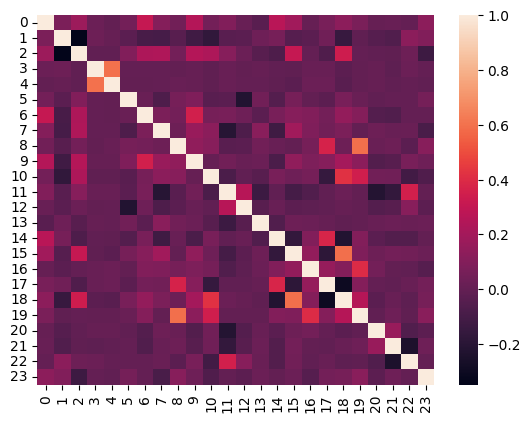

In [ ]:
corr=df.corr()
#plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False)
plt.show()

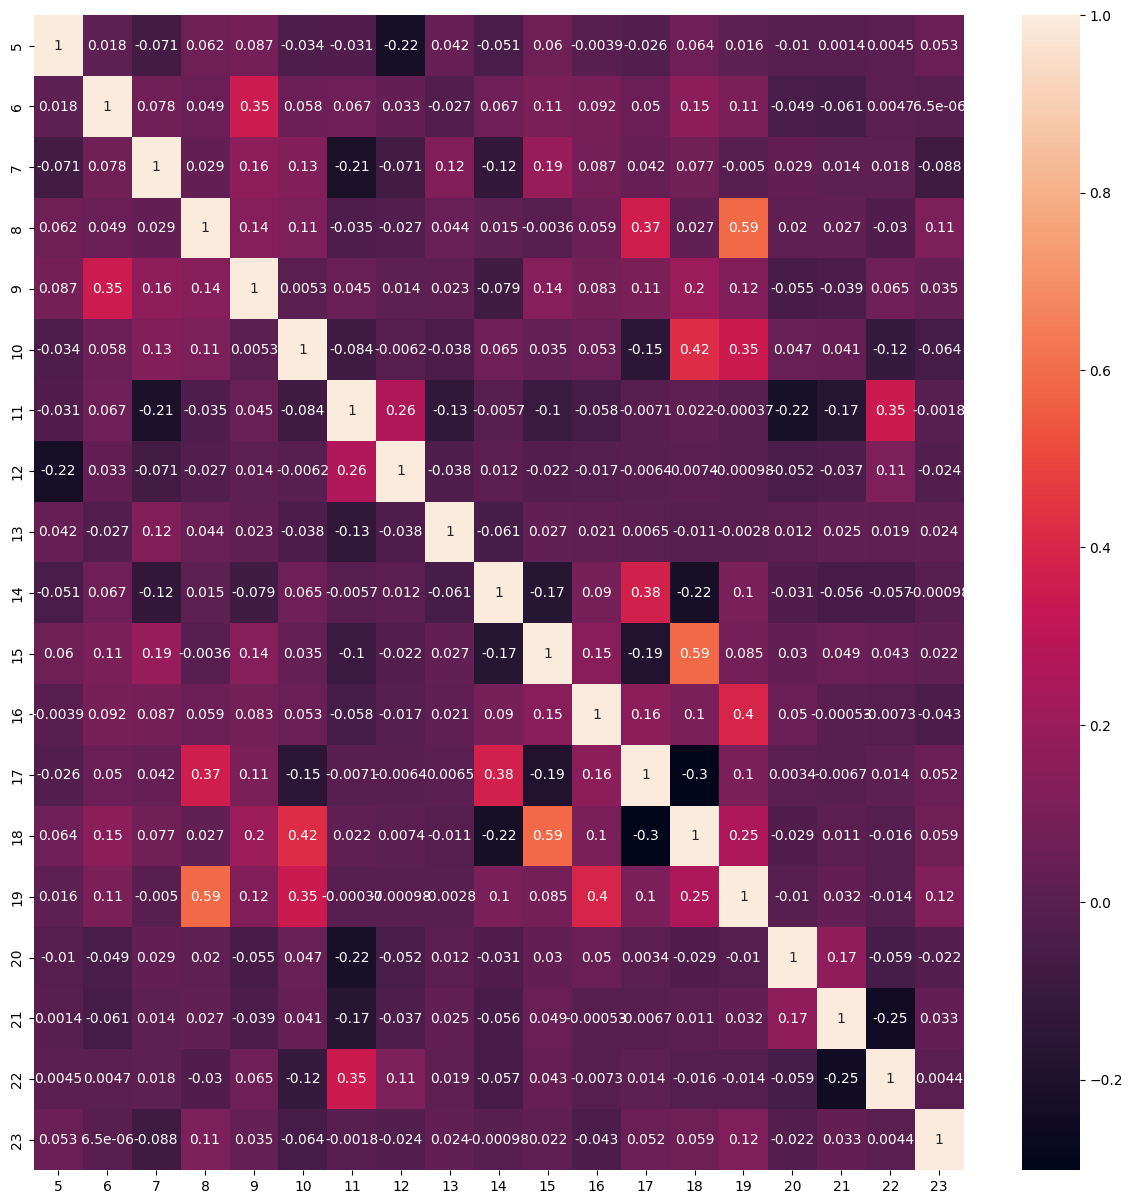

In [ ]:
df1 = df.columns[5:]
corr=df[df1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

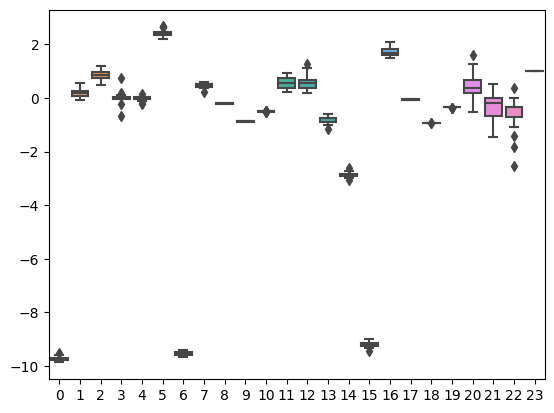

In [ ]:
sns.boxplot(data=df[0:22])
plt.show()

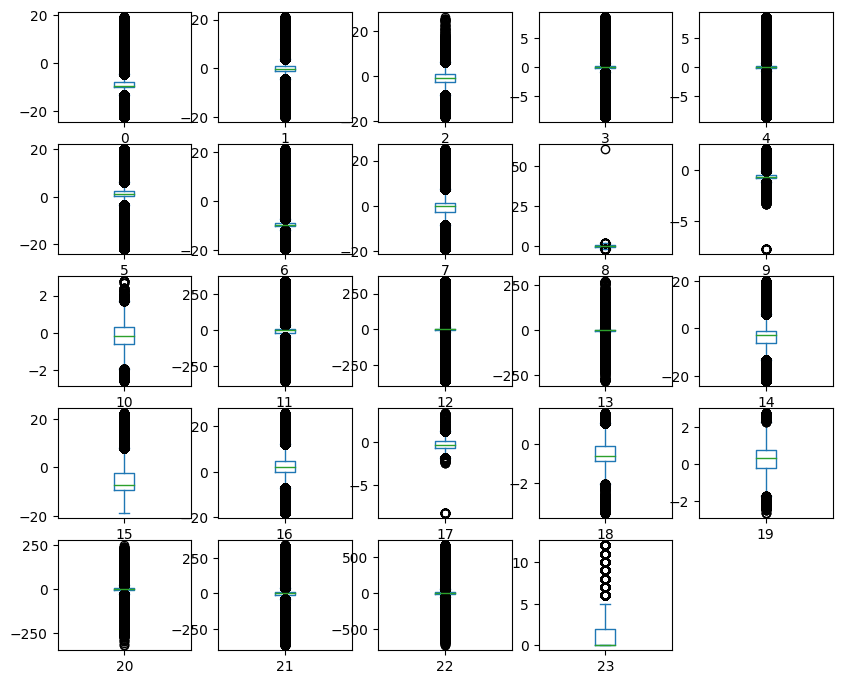

In [ ]:
df.plot(kind='box',subplots=True,layout = (6,5),figsize=(10,10))
plt.show()

(array([903270.,  30720.,  30720.,  30720.,  30720.,  57756.,  29337.,
         30720.,  30720.,  41062.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

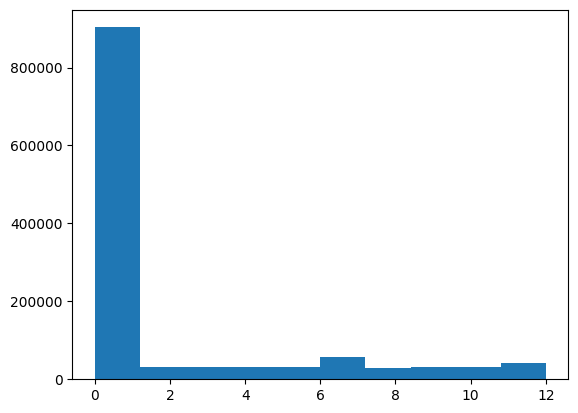

In [ ]:
plt.hist(df[23])

### Data Preparation
##### First, I split the data bettwen the dependent variables and dependent variable. The independent variables will be stored in X and the target variable will be stored in y.

In [ ]:
from sklearn.utils import resample

activity = 2000
df_min = pd.DataFrame()  # Create an empty DataFrame to store the sampled data

# Iterate over unique types in the df[23] column
for i in df[23].unique():
    # Select 1000 instances of each type using resample
    df_type = resample(df[df[23] == i], n_samples=activity, random_state=42)
    # Concatenate the sampled data with the df_min DataFrame
    df_min = pd.concat([df_min, df_type])

# Reset the index of the resulting DataFrame
df_min = df_min.reset_index(drop=True)
df_min.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-8.1302,-0.561420,-4.513700,0.020931,0.004186,-0.68636,-5.2902,4.64530,0.13544,-0.83114,...,-8.4230,-6.6402,2.9805,-0.93922,0.090349,0.21983,11.42200,-24.7380,5.8910,0
1,-8.4553,3.065800,-3.924100,0.196760,-0.167450,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,...,2.2046,-7.5497,4.0288,-0.21961,-1.080100,0.30388,-6.38580,25.6900,3.5865,0
2,-9.4779,-0.851280,1.912900,-0.050235,-0.058608,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,...,-2.5898,-8.5217,3.8343,-0.88431,-0.848050,0.33190,-0.91064,-1.2975,-3.6153,0
3,-6.2924,-0.024481,-3.844300,0.071167,-0.075353,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,...,-1.0049,-6.8588,2.1154,-0.35686,-0.854210,-0.41595,-4.68740,-1.9565,-18.8470,0
4,-9.6233,-0.146080,-0.065779,-0.343280,-0.996340,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,...,-1.4178,-9.5157,1.4305,-0.12353,-0.967150,-0.49784,-0.37914,-2.0069,-1.4316,0


In [ ]:
X = df_min.drop([23], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-8.1302,-0.561420,-4.513700,0.020931,0.004186,-0.68636,-5.2902,4.64530,0.13544,-0.83114,...,-8.559000,-8.4230,-6.6402,2.9805,-0.93922,0.090349,0.21983,11.42200,-24.7380,5.8910
1,-8.4553,3.065800,-3.924100,0.196760,-0.167450,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,...,-12.820000,2.2046,-7.5497,4.0288,-0.21961,-1.080100,0.30388,-6.38580,25.6900,3.5865
2,-9.4779,-0.851280,1.912900,-0.050235,-0.058608,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,...,-0.003672,-2.5898,-8.5217,3.8343,-0.88431,-0.848050,0.33190,-0.91064,-1.2975,-3.6153
3,-6.2924,-0.024481,-3.844300,0.071167,-0.075353,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,...,10.937000,-1.0049,-6.8588,2.1154,-0.35686,-0.854210,-0.41595,-4.68740,-1.9565,-18.8470
4,-9.6233,-0.146080,-0.065779,-0.343280,-0.996340,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,...,-0.870150,-1.4178,-9.5157,1.4305,-0.12353,-0.967150,-0.49784,-0.37914,-2.0069,-1.4316


In [ ]:
y = df_min[23]
y

0        0
1        0
2        0
3        0
4        0
        ..
25995    5
25996    5
25997    5
25998    5
25999    5
Name: 23, Length: 26000, dtype: int64

#### I only analyze ankle and arm sensor and exclude heart monitoring.

In [ ]:
X = X.drop([0,1,2,3,4], axis=1)
X.head()

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,36.53800,-10.82400,-8.559000,-8.4230,-6.6402,2.9805,-0.93922,0.090349,0.21983,11.42200,-24.7380,5.8910
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,3.27270,-8.84010,-12.820000,2.2046,-7.5497,4.0288,-0.21961,-1.080100,0.30388,-6.38580,25.6900,3.5865
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,0.00011,0.36697,-0.003672,-2.5898,-8.5217,3.8343,-0.88431,-0.848050,0.33190,-0.91064,-1.2975,-3.6153
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,26.56700,-6.87120,10.937000,-1.0049,-6.8588,2.1154,-0.35686,-0.854210,-0.41595,-4.68740,-1.9565,-18.8470
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-0.33491,1.10430,-0.870150,-1.4178,-9.5157,1.4305,-0.12353,-0.967150,-0.49784,-0.37914,-2.0069,-1.4316


### Train, Validation, & Test Data

In [ ]:
pd.set_option('display.max_columns', 1000)
RANDOM_STATE = 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:xlabel='23'>

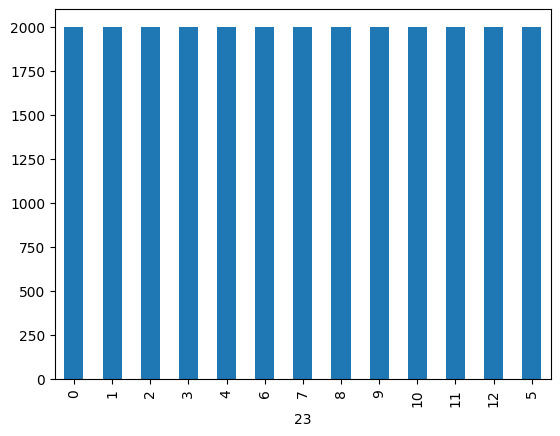

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
X_train.shape

(10400, 18)

In [ ]:
X_val.shape

(10400, 18)

In [ ]:
X_test.shape

(5200, 18)

### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
predtrarn = rf.predict(X_train)
predtestrn = rf.predict(X_val)

In [ ]:
met = metrics.classification_report(y_true = y_val, y_pred = predtestrn, output_dict = True)
print('Sensitivity: %.3f' %(met['1']['recall']))
print('Specificity: %.3f' %(met['0']['recall']))
print('Precision: %.3f' %(met['1']['precision']))
print('Accuracy: %.3f' %(balanced_accuracy_score(y_val, predtestrn)))
print('F1 Score: %.3f' %(met['1']['f1-score']))
print('\n', metrics.classification_report(y_true = y_val, y_pred = predtestrn))

Sensitivity: 0.996
Specificity: 0.489
Precision: 0.975
Accuracy: 0.933
F1 Score: 0.986

               precision    recall  f1-score   support

           0       0.88      0.49      0.63       802
           1       0.98      1.00      0.99       788
           2       0.98      1.00      0.99       819
           3       0.99      1.00      0.99       795
           4       0.89      0.99      0.94       783
           5       0.88      0.93      0.91       756
           6       0.89      0.98      0.93       806
           7       0.95      0.99      0.97       794
           8       0.92      0.94      0.93       761
           9       0.96      0.99      0.97       854
          10       0.94      0.91      0.93       797
          11       0.91      0.98      0.94       804
          12       0.96      0.94      0.95       841

    accuracy                           0.93     10400
   macro avg       0.93      0.93      0.93     10400
weighted avg       0.93      0.93      0.93  

In [ ]:
minlist = [100,200,300,400,500]
maxlist = [100,150,200,250,300]
elist = [10,20,30,40,50]

par = {'min_samples_split': minlist, 'max_depth': maxlist, 'n_estimators': elist, 'random_state': [42]}
grid = GridSearchCV(estimator = rf, param_grid = par, cv = 5, verbose = 1, n_jobs = -1, scoring = 'balanced_accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 150, 200, 250, 300],
                         'min_samples_split': [100, 200, 300, 400, 500],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [42]},
             scoring='balanced_accuracy', verbose=1)

In [ ]:
grid.best_params_
grid.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50,
                       random_state=42)

In [ ]:
rnn = RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50, random_state=42)
rnn.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50,
                       random_state=42)

In [ ]:
predtrain = rnn.predict(X_train)
predrn = rnn.predict(X_val)

In [ ]:
met = metrics.classification_report(y_true = y_val, y_pred = predrn, output_dict = True)
print('Sensitivity:',(met['1']['recall']))
print('Specificity:',(met['0']['recall']))
print('Precision:',(met['1']['precision']))
print('Balanced Accuracy:',(balanced_accuracy_score(y_val, predrn)))
print('F1 Score:',(met['1']['f1-score']))
print('\n', metrics.classification_report(y_true = y_val, y_pred = predrn))

Sensitivity: 0.9708121827411168
Specificity: 0.26683291770573564
Precision: 0.9646910466582598
Balanced Accuracy: 0.8577526260113453
F1 Score: 0.967741935483871

               precision    recall  f1-score   support

           0       0.89      0.27      0.41       802
           1       0.96      0.97      0.97       788
           2       0.97      1.00      0.99       819
           3       0.99      1.00      0.99       795
           4       0.81      0.96      0.88       783
           5       0.79      0.85      0.82       756
           6       0.70      0.95      0.80       806
           7       0.91      0.91      0.91       794
           8       0.85      0.78      0.82       761
           9       0.95      0.96      0.96       854
          10       0.81      0.77      0.79       797
          11       0.75      0.92      0.83       804
          12       0.86      0.81      0.83       841

    accuracy                           0.86     10400
   macro avg       0.87  

In [ ]:
minlist = [1,2,3,4,5]
maxlist = [10,15,20,25,30]
elist = [10,20,30,40,50]

rn = RandomForestClassifier(random_state=RANDOM_STATE)
par = {'min_samples_split': minlist, 'max_depth': maxlist, 'n_estimators': elist, 'random_state': [42]}
grid = GridSearchCV(estimator = rn, param_grid = par, cv = 5, verbose = 1, n_jobs = -1, scoring = 'balanced_accuracy')
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=50,
                       random_state=42)

In [ ]:
clf_rf = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred = clf_rf.predict(X_train)
y_val_pred = clf_rf.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("RandomForestClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1450
           1       0.98      1.00      0.99      1460
           2       1.00      1.00      1.00      1408
           3       1.00      1.00      1.00      1432
           4       1.00      1.00      1.00      1441
           5       1.00      1.00      1.00      1419
           6       0.99      1.00      1.00      1463
           7       1.00      1.00      1.00      1419
           8       1.00      1.00      1.00      1434
           9       1.00      1.00      1.00      1448
          10       1.00      1.00      1.00      1434
          11       1.00      1.00      1.00      1479
          12       1.00      1.00      1.00      1433

    accuracy                           1.00     18720
   macro avg       1.00      1.00      1.00     18720
weighted avg       1.00      1.00      1.00     18720

[[1384   29    3    3    4    2    6    5    4    5    0    5   

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
def error_rmse(true, pred):
    '''
    Returns the RMSE based on given true and predicted arrays.
    Both inputs are assumed to be numoy arrays
    '''
    from sklearn import metrics
    return np.sqrt(metrics.mean_squared_error(true, pred))